In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Homework 3

**Instructions:** Complete the notebook below. Download the completed notebook in HTML format. Upload assignment using Canvas.

**Due:** Jan. 31 at **12:30pm**.

## Exercise: Income and Growth Across Countries

The data file `cross_country_gdp_pc.csv` contains annual data on GDP per capita for over 100 countries and is available here: https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_gdp_pc.csv. The data are was constructed from the Penn World Table (https://www.rug.nl/ggdc/productivity/pwt/).

In this exercise, you will:

1. Analyze some basic facts about GDP per capita across the world.
2. Compute the average annual growth rate of GDP per capita for each country in the data.
3. Compute a linear regression of average GDP per capita growth on GDP per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [2]:
# Create a variable called 'data' that stores the data in the file 'cross_country_gdp_pc.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column
data = pd.read_csv('https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/cross_country_gdp_pc.csv',index_col=0)

# Print the first 5 rows of data
data.head()

,Argentina - ARG,Australia - AUS,Austria - AUT,Burundi - BDI,Belgium - BEL,Benin - BEN,Burkina Faso - BFA,Bangladesh - BGD,Bolivia (Plurinational State of) - BOL,Brazil - BRA,...,Turkey - TUR,Taiwan - TWN,U.R. of Tanzania: Mainland - TZA,Uganda - UGA,Uruguay - URY,United States - USA,Venezuela (Bolivarian Republic of) - VEN,South Africa - ZAF,Zambia - ZMB,Zimbabwe - ZWE
Year,,,,,,,,,,,,,,,,,,,,,
1960,2851.49,14223.37,8984.20,676.57,9100.09,1616.84,724.34,1429.30,1771.04,2114.20,...,4691.59,2376.92,1173.90,789.13,6731.78,17462.63,6749.85,5913.81,1665.98,1990.92
1961,2897.14,14303.40,9427.85,570.27,9550.57,1601.02,681.06,1391.08,1785.90,2338.23,...,4649.28,2442.46,1187.66,782.75,6739.92,17616.14,6721.12,6008.94,1670.34,2040.24
1962,2903.85,14820.87,9630.59,607.52,10008.56,1522.49,724.86,1445.78,1816.33,2442.88,...,4820.57,2550.53,1267.04,778.84,6725.06,18395.60,6972.68,6119.67,1581.47,1960.41
1963,2758.01,15573.81,9960.43,623.15,10322.03,1572.27,698.74,1505.08,1889.88,2533.68,...,5163.09,2725.46,1330.11,774.15,6514.72,18943.34,7222.31,6466.65,1614.93,1944.13
1964,2853.73,16042.42,10375.80,611.82,10947.25,1622.50,718.58,1466.38,1961.70,2572.07,...,5211.92,2947.73,1492.33,816.41,6683.54,19808.61,7757.37,6738.99,1792.59,1836.15


In [3]:
# Each column contains data for a specific country. Print the number of countries (e.g., the length of data.columns)
print("Number of countries: ",len(data.columns))

Number of countries:  111


In [4]:
# Each column contains data for a specific year. Print the number of countries (e.g., the length of data.index)
print("Number of years of observations: ",len(data.index))

Number of years of observations:  58


In [5]:
# Print the values of the initial year and the final year in the data
print("Initial year: ",data.index[0])
print("Final year:   ",data.index[-1])

Initial year:  1960
Final year:    2017


In [6]:
# Create a variable called 'data_initial' that is equal to the first row of the data DataFrame
data_initial = data.iloc[0]

# Create a variable called 'data_final' that is equal to the last row of the data DataFrame
data_final = data.iloc[-1]

In [7]:
# Use the sort_values() method of data_initial to sort the Series in ascending order.
data_initial=data_initial.sort_values()

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the initial year of the data
print('Countries with lowest GDP per capita in '+str(data.index[0])+':\n')
print(data_initial.head(10))

Countries with lowest GDP per capita in 1960:

Botswana - BWA         404.68
Mozambique - MOZ       493.70
Ethiopia - ETH         522.52
Burundi - BDI          676.57
Egypt - EGY            685.77
Nepal - NPL            701.33
Mali - MLI             703.97
Malta - MLT            718.99
Burkina Faso - BFA     724.34
Guinea-Bissau - GNB    763.46
Name: 1960, dtype: float64


In [8]:
# Use the sort_values() method of data_final to sort the Series in ascending order.
data_final=data_final.sort_values()

# Print the name and GDP per capita of the countries with the 10 lowest GDPs per capita in the final year of the data
print('Countries with lowest GDP per capita in '+str(data.index[-1])+':\n')
print(data_final.head(10))

Countries with lowest GDP per capita in 2017:

Central African Republic - CAF     727.29
D.R. of the Congo - COD            760.47
Burundi - BDI                      799.61
Niger - NER                        908.65
Malawi - MWI                      1038.32
Chad - TCD                        1307.97
Mozambique - MOZ                  1376.55
Togo - TGO                        1566.15
Ethiopia - ETH                    1591.49
Madagascar - MDG                  1591.55
Name: 2017, dtype: float64


In [9]:
# Print the names of the countries that are among the 10 with lowest GDPs per capita in BOTH the initial year and 
# the final year.
print('Countries among lowest 10 GDPs per capita in '+str(data.index[0])+' and '+str(data.index[-1])+':\n')
for country in data_initial.head(10).index:
    if country in data_final.head(10).index:
        print(country.split("-")[0])

Countries among lowest 10 GDPs per capita in 1960 and 2017:

Mozambique 
Ethiopia 
Burundi 


In [10]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the initial year of the data
print('Countries with highest GDP per capita in both '+str(data.index[0])+':\n')
print(data_initial.tail(10))

Countries with highest GDP per capita in both 1960:

Netherlands - NLD       11461.35
Sweden - SWE            11766.14
United Kingdom - GBR    11909.77
Denmark - DNK           12026.71
New Zealand - NZL       12835.86
Canada - CAN            13360.91
Australia - AUS         14223.37
Luxembourg - LUX        15757.45
United States - USA     17462.63
Switzerland - CHE       20086.09
Name: 1960, dtype: float64


In [11]:
# Print the name and GDP per capita of the countries with the 10 highest GDPs per capita in the final year of the data
print('Countries with highest GDP per capita in '+str(data.index[-1])+':\n')
print(data_final.tail(10))

Countries with highest GDP per capita in 2017:

Austria - AUT          46103.27
Netherlands - NLD      46601.56
Australia - AUS        47392.62
Germany - DEU          47556.00
United States - USA    54794.76
Norway - NOR           60590.25
Switzerland - CHE      64219.30
Singapore - SGP        67138.11
Luxembourg - LUX       74605.23
Ireland - IRL          75916.08
Name: 2017, dtype: float64


In [12]:
# Print the names of the countries that are among the 10 with highest GDPs per capita in BOTH the initial year
# and the final year
print('Countries among highest 10 GDPs per capita in both '+str(data.index[0])+' and '+str(data.index[-1])+':\n')
for country in data_initial.tail(10).index:
    if country in data_final.tail(10).index:
        print(country.split("-")[0])

Countries among highest 10 GDPs per capita in both 1960 and 2017:

Netherlands 
Australia 
Luxembourg 
United States 
Switzerland 


### Part (b)

Let $y_t$ denotes GDP per capita for some country in some year $t$ and let $g$ denotes the average annual growth in GDP per capita between years 0 and $T$. $g$ is defined by:
\begin{align}
y_T & = (1+g)^T y_0
\end{align}
which implies:
\begin{align}
g & = \left(\frac{y_T}{y_0}\right)^{1/T} - 1
\end{align}
We can use this equation to compute the aveage growth rate of GDP per capita for each country in our data. Note that for our data, $T$ is equal to `len(data.index)-1`.

In [13]:
# Create a variable called 'growth_rates' that contains the average growth rate of each country in the data.
# NOTE: You do not need to re-sort the variables data_initial and data_final. If their indices don't align,
# Pandas will automatically sort their indices alphabetically.
T = len(data.index)-1
growth_rates = (data_final/data_initial)**(1/T)-1

# Use the sort_values() method of growth_rates to sort the Series in ascending order.
growth_rates=growth_rates.sort_values()

In [14]:
# Print the average growth rate of GDP per capita for all countries rounded to 4 decimal places
print('Average growth rate of GDP per capita for all countries: ',round(growth_rates.mean(),4))

Average growth rate of GDP per capita for all countries:  0.0224


In [15]:
# Print the standard deviation of the growth rate of GDP per capita for all countries rounded to 4 decimal places
print('Standard deviation of the growth rate of GDP per capita for all countries: ',round(growth_rates.std(),4))

Standard deviation of the growth rate of GDP per capita for all countries:  0.0159


In [16]:
# Print the name and growth rates of the countries with the 10 lowest growth rates of GDP per capita
print('Countries with lowest growth rates of GDP per capita:\n')
print(growth_rates.head(10))

Countries with lowest growth rates of GDP per capita:

D.R. of the Congo - COD          -0.022039
Central African Republic - CAF   -0.011405
Niger - NER                      -0.007151
Guinea - GIN                     -0.004706
Zimbabwe - ZWE                   -0.001082
Chad - TCD                       -0.000086
Gambia - GMB                      0.000916
Nigeria - NGA                     0.001056
Madagascar - MDG                  0.001781
Barbados - BRB                    0.001924
dtype: float64


In [17]:
# Print the name and growth rates of the countries with the 10 highest growth rates of GDP per capita
print('Countries with highest growth rates of GDP per capita:\n')
print(growth_rates.tail(10))

Countries with highest growth rates of GDP per capita:

China - CHN                0.045830
Thailand - THA             0.048224
Equatorial Guinea - GNQ    0.048863
Egypt - EGY                0.050227
Romania - ROU              0.051858
Taiwan - TWN               0.052199
Singapore - SGP            0.058379
Republic of Korea - KOR    0.063021
Botswana - BWA             0.065429
Malta - MLT                0.068160
dtype: float64


In [18]:
# Print the names of the countries that were BOTH among the 10 with lowest GDPs per capita in the initial year and 
# among the 10 with the highest growth of GDP per capita.
print('Countries among highest 10 GDPs per capita in both '+str(data.index[0])+' and '+str(data.index[-1])+':\n')
for country in growth_rates.tail(10).index:
    if country in data_initial.head(10).index:
        print(country.split("-")[0])

Countries among highest 10 GDPs per capita in both 1960 and 2017:

Egypt 
Botswana 
Malta 


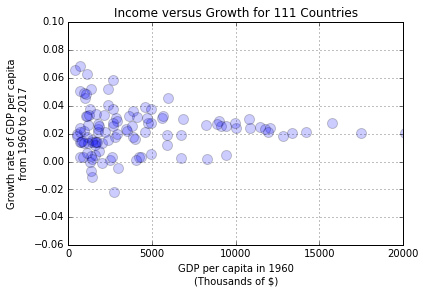

In [19]:
# Use the sort_index() method of data_initial to alphabetize the index [e.g., data_initial = data_initial.sort_index()]
data_initial = data_initial.sort_index()

# Use the sort_index() method of growth_rates to alphabetize the index
growth_rates = growth_rates.sort_index()

# Construct a scatter plot with:
#     1. GDP per capita in the initial year on the horizontal axis
#     2. Average growth rate of GDP per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. x-axis limit: [0,20000]
#     6. Suitable title and labels for the axes

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(data_initial,growth_rates,s=100,alpha=0.2)
ax.set_title('Income versus Growth for '+str(len(data.columns))+' Countries')
ax.set_xlabel('GDP per capita in '+str(data.index[0])+'\n(Thousands of $)')
ax.set_ylabel('Growth rate of GDP per capita\nfrom '+str(data.index[0])+' to '+str(data.index[-1]))
ax.set_xlim([0,20000])
ax.grid()

**Question**

1. Describe in words the relationship between GDP per capita in the initial year and average growth of GDP per capita. How is the relationship different for low income countries and high income countries?

**Answer**

1. There is a right-pointing triangle-shaped relationship between GDP per capita in the initial year and average growth of GDP per capita. Countries with high GDP per capita in the initial year had average growth rates that were almost uniformly close to the world average of about 2 percent. Countries with lower GDP per capita in the initial year had much more variation across the average growth rates of their GDP per capita. The countries with the highest growth rates of GDP per capita were among the lowest income initially and the countries with the lowest growth rates of GDP per capita were also among the lowest income initially.<!-- answer -->

### Part (c)

In this part you will use OLS to estimate the relationship between GDP per capita in the initial year and average growth of GDP per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is country $i$'s initial GDP per capita, and $\epsilon_i$ is the residual of the regression.

In [20]:
growth_rates = growth_rates.sort_index()
data_initial = data_initial.sort_index()


# Create a variable called 'y' that is equal to the average growth rates of the countries
y = growth_rates

# Create a variable called x' that is equal to the GDP per capita of the countries in the initial year
x = data_initial

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x = sm.add_constant(data_initial)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model = sm.OLS(y,x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results = model.fit()

# Print the summary of results generated by the summary() method of results
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     -0.009    
Dependent Variable: y                AIC:                -601.5469 
Date:               2020-01-24 10:32 BIC:                -596.1278 
No. Observations:   111              Log-Likelihood:     302.77    
Df Model:           1                F-statistic:        0.01452   
Df Residuals:       109              Prob (F-statistic): 0.904     
R-squared:          0.000            Scale:              0.00025479
----------------------------------------------------------------------
          Coef.     Std.Err.       t       P>|t|      [0.025    0.975]
----------------------------------------------------------------------
const     0.0226      0.0022    10.3406    0.0000     0.0182    0.0269
1960     -0.0000      0.0000    -0.1205    0.9043    -0.0000    0.0000
-------------------------------------------------------------------
Omnibus:                4.381        Durbin-Watson:

/Users/bcjenkin/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the estimate for the constant. Where did we see this number earlier?
3. Interpret the R-squared of the regression.

**Answers**

1. The estimated coefficient on $y_i$ is both very close to zero and is not statistically different from zero.<!-- answer -->
2. The estimated constant is equal to the average growth rate of GDP per capita across all countries and we computed that in the second code cell of Part (b).<!-- answer -->
3. The R-squared implies that the linear regression model explains essentially zero percent of the variation in average GDP per capita growth across countries.<!-- answer -->

## Exercise: Income and Growth Across US States

The data file `state_income_data.csv` contains annual data on income per capita for the 48 continental states, Washington D.C., and the United States as a whole and is available here: https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv. 

In this exercise, you will:

1. Analyze some basic facts about income per capita among US states.
2. Compute the average annual growth rate of income per capita for each state in the data.
3. Compute a linear regression of average income per capita growth on income per capita in the initial year.

Follow the instructions in the following cells.

### Part (a)

In [21]:
# Create a variable called 'state_df' that stores the data in the file 'cross_country_gdp_pc.csv' in a DataFrame
# Make sure that 'Year', the left-most column of the data, is set to be the index column
state_df= pd.read_csv('https://raw.githubusercontent.com/letsgoexploring/economic-data/master/us-convergence/csv/state_income_data.csv',index_col=0)

# Print the first 5 rows of data
print(state_df.head())

               AL           AR           AZ            CA           CO  \
1840   915.824576  1175.020210          NaN           NaN          NaN   
1880  1075.181892  1190.379951  4550.323363   3724.737268  4243.128537   
1900  1285.610348  1306.345998  4147.130154   3753.152789  3628.738884   
1929  3223.520000  3051.740000  6042.850000  10034.360000  6366.210000   
1930  2758.260000  2349.240000  5432.620000   9323.540000  6019.930000   

                CT        DC            DE           FL           GA  ...  \
1840   1572.453517       NaN   1175.020210  1192.299919   984.943411  ...   
1880   2803.152789       NaN   2073.565077   921.584479  1075.181892  ...   
1900   3234.761520       NaN   2591.956346  1389.288601  1161.196443  ...   
1929  10398.140000  13369.04  10418.350000  5244.540000  3466.050000  ...   
1930   9711.590000  13780.81   8998.430000  4897.750000  3177.770000  ...   

               TN           TX           UT  United States           VA  \
1840   812.146322

The DataFrame method `dropna()` returns a DataFrame that omits rows that contain missing (NaN means *not a number*) values. The following command will remove the rows with missing values from the DataFrame `df`:

    df =  df.dropna()
    
The DataFrame method `drop()` returns a DataFrame that omits rows or columns with a given label. The following command will remove the column named `'LABEL'` from the DataFrame `df`:   
   
    df = df.drop('LABEL',axis=1)
    
The argument `axis=1` means to look among the columns for `'LABEL'`. If we had wanted to remove a row with the index value `'LABEL'`, then the axis argument would have been: `axis=0`.

In [22]:
# Remove the rows with missing data from state_df
state_df = state_df.dropna()

# Remove the column named 'United States' from state_df
state_df = state_df.drop('United States',axis=1)

# Set state_df equal to itself divided by 1000 so that its units are in thousands of dollars
state_df = state_df/1000

# Print the first 5 rows of data
print(state_df.head())

           AL       AR       AZ        CA       CO        CT        DC  \
1929  3.22352  3.05174  6.04285  10.03436  6.36621  10.39814  13.36904   
1930  2.75826  2.34924  5.43262   9.32354  6.01993   9.71159  13.78081   
1931  2.57160  2.41964  5.02630   8.80187  5.51724   9.42139  14.64641   
1932  2.10512  2.01245  4.24997   7.73203  4.71336   8.30134  14.65643   
1933  2.23281  2.08305  4.20694   7.47447  4.80599   8.03268  12.86590   

            DE       FL       GA  ...       SD       TN       TX       UT  \
1929  10.41835  5.24454  3.46605  ...  4.19361  3.76920  4.77971  5.53759   
1930   8.99843  4.89775  3.17777  ...  3.74410  3.36654  4.26848  5.18091   
1931   9.05903  4.64056  2.96902  ...  2.82876  3.19112  4.03273  4.34833   
1932   7.82471  4.19701  2.60824  ...  2.50232  2.56852  3.46882  4.02489   
1933   7.70592  3.93465  2.75017  ...  1.85160  2.73656  3.45813  4.04357   

           VA       VT       WA       WI       WV       WY  
1929  4.39572  6.36621  7.47777

In [23]:
# Create a variable called 'state_growth_rates' that contains the average growth rate of each state in the data.
T = len(state_df)-1
state_growth_rates = (state_df.iloc[-1]/state_df.iloc[0])**(1/T)-1

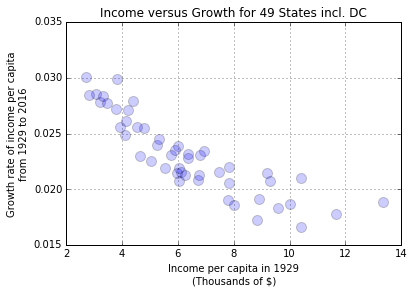

In [24]:
# Construct a scatter plot with:
#     1. GDP per capita in the initial year on the horizontal axis
#     2. Average growth rate of GDP per capita on the vertical axis
#     3. Size of scatter plot markers at least 50
#     4. Opacity of scatter plot markers no greater than 0.5
#     5. y-axis limit: [0.015,0.035]
#     6. Suitable title and labels for the axes

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(state_df.iloc[0],state_growth_rates,s=100,alpha=0.2)
ax.set_title('Income versus Growth for '+str(len(state_df.columns))+' States incl. DC')
ax.set_xlabel('Income per capita in '+str(state_df.index[0])+'\n(Thousands of $)')
ax.set_ylabel('Growth rate of income per capita\nfrom '+str(state_df.index[0])+' to '+str(state_df.index[-1]))
ax.set_ylim([0.015,0.035])
ax.grid()

### Part (b)

Like you did for the country data above, use OLS to estimate the relationship between income per capita in the initial year and average growth of income per capita.

\begin{align}
g_i & = \beta_0 + \beta_{\text{1}}y_i + \epsilon_i,
\end{align}

where $g_i$ is the average annual growth rate of country $i$, $y_i$ is state $i$'s initial income per capita, and $\epsilon_i$ is the residual of the regression.

In [25]:
# Create a variable called 'y' that is equal to the average growth rates of the states
y = state_growth_rates

# Create a variable called x' that is equal to the income per capita of the states in the initial year
x = state_df.iloc[0]

# Use the Statsmodels function add_constant() to add a constant column to the variable x
x = sm.add_constant(x)

# Create a variable called 'model' equal to the output of the Statsmodels OLS function regressing y upon x
model = sm.OLS(y,x)

# Create a variable called 'results' that stores the fitted model (i.e., the output of the fit() method of model)
results = model.fit()

# Print the summary of results generated by the summary() method of results
print(results.summary2())

                  Results: Ordinary least squares
Model:              OLS              Adj. R-squared:     0.757     
Dependent Variable: y                AIC:                -483.2704 
Date:               2020-01-24 10:32 BIC:                -479.4867 
No. Observations:   49               Log-Likelihood:     243.64    
Df Model:           1                F-statistic:        150.9     
Df Residuals:       47               Prob (F-statistic): 2.82e-16  
R-squared:          0.762            Scale:              2.9300e-06
---------------------------------------------------------------------
            Coef.    Std.Err.      t       P>|t|     [0.025    0.975]
---------------------------------------------------------------------
const       0.0309     0.0007    45.3635   0.0000    0.0295    0.0323
1929       -0.0012     0.0001   -12.2826   0.0000   -0.0014   -0.0010
-------------------------------------------------------------------
Omnibus:                1.395        Durbin-Watson:     

**Questions**

1. Interpret the estimate for the coefficient on $y_i$.
2. Interpret the R-squared of the regression.
3. Why do you think that initial income and average growth are so strongly correlated in the state data but not so in the country data? (If you're not sure, referesh your knowledge about the difference between *conditional* and *unconditional* convergence: https://en.wikipedia.org/wiki/Convergence_(economics)#Types_of_Convergence)

**Answers**

1. The estimated coefficient on $y_i$ implies that a \$1,000 increase in income per captia reduces a states average growth rate of income per capita by 1.2 percent. I.e., states with lower initial income had greater income growth than higher income states. <!-- answer -->
2. The R-squared implies that the linear regression model explains about 76 percent of the variation in average income per capita growth across states.<!-- answer -->
3. Lower-income US states are "economically similar" to higher-income states in that they have the same currency, federal regulation, legal traditions, and language, and they have similar laws, poltical institutions. Therefore, it's not surprising to observe *catch-up growth* among the lower-income states. By contrast, lower-income countries are a diverse group with broad differences in policies and institutions and so it is not at all guaranteed that low income countries will enjoy catch-up growth simply by virtue of their low income. <!-- answer -->